In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [1]:
#import the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns 
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator 
from PIL import Image
import datetime

mpl.rcParams['font.sans-serif'] = ['SimHei']  
plt.style.use('ggplot') 

In [4]:
#read the csv file 
df=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv') 

In [6]:
#Basic EDA
df.head() 

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
print('Rows     :',df.shape[0]) 
print('Columns  :',df.shape[1]) 
print('\nFeatures :\n     :',df.columns.tolist()) 
print('\nMissing values    :',df.isnull().values.sum()) 
print('\nUnique values :  \n',df.nunique()) 

Rows     : 7728394
Columns  : 46

Features :
     : ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values    : 12840498

Unique values :  
 ID                       7728394
Source                         3
Severity                       4
Start_Time               6131796
End_Time                 6705355
Start_Lat                2448005
Start_Lng                2493815
End_Lat          

In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [15]:
df.select_dtypes(exclude=['int','float']).columns 

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [16]:
df['Description'].head() 

0    Right lane blocked due to accident on I-70 Eas...
1    Accident on Brice Rd at Tussing Rd. Expect del...
2    Accident on OH-32 State Route 32 Westbound at ...
3    Accident on I-75 Southbound at Exits 52 52B US...
4    Accident on McEwen Rd at OH-725 Miamisburg Cen...
Name: Description, dtype: object

In [17]:
print(df['Source'].unique()) 
print(df['Description'].unique())
print(df['Timezone'].unique())
print(df['Amenity'].unique())

['Source2' 'Source3' 'Source1']
['Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.'
 'Accident on Brice Rd at Tussing Rd. Expect delays.'
 'Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.'
 ... 'Ramp closed to Bristol St - Road closed due to accident.'
 'At Friars Rd - Accident. Center lane blocked.'
 'Ramp closed to The City Dr/Exit 14A - Road closed due to accident.']
['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']
[False  True]


In [21]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

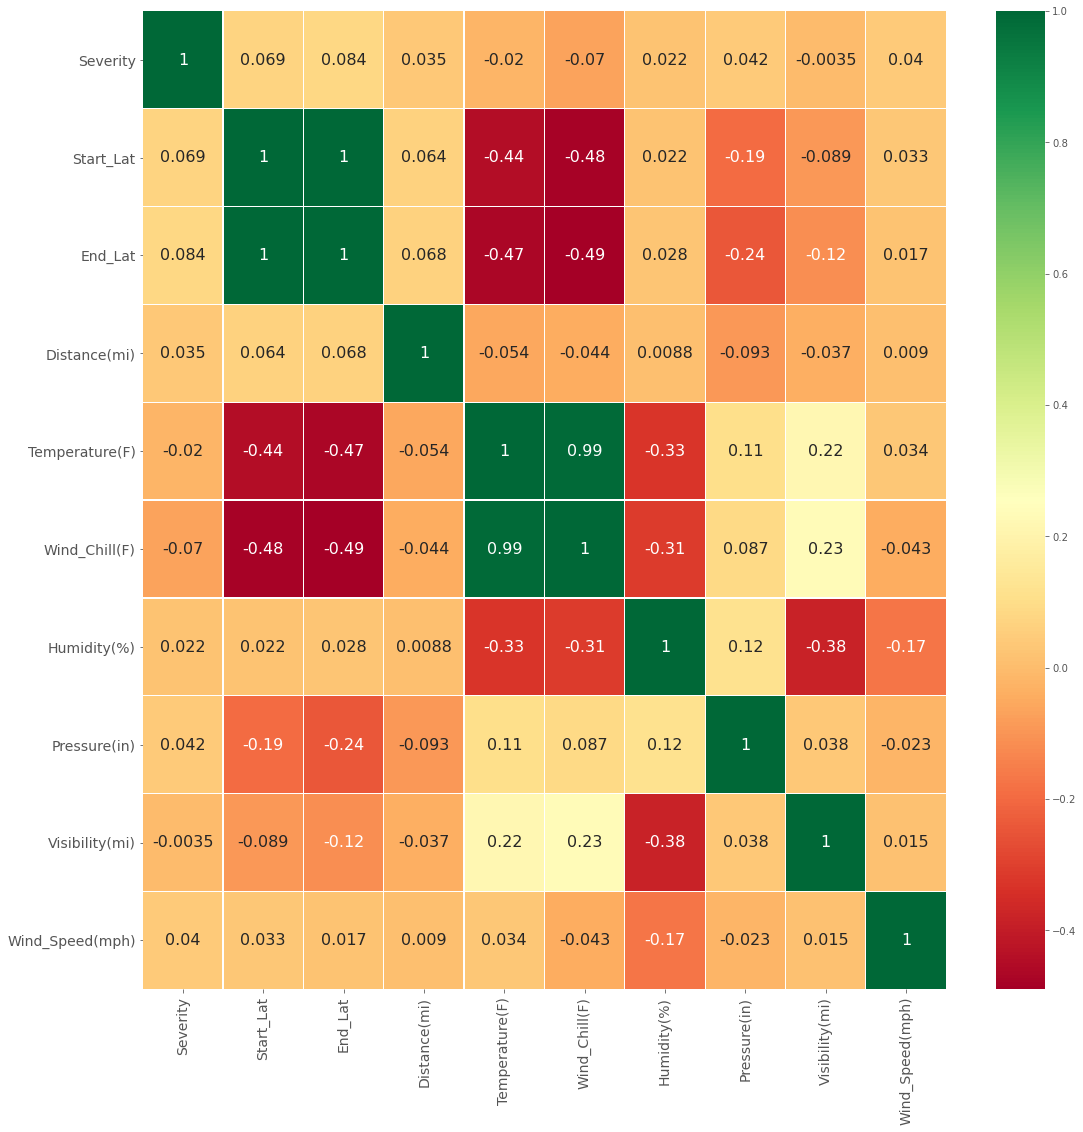

In [22]:
#Heatmap of the occurence of accidents according to each stat
fig=sns.heatmap(df[['Severity','Start_Lat','End_Lat','Distance(mi)','Temperature(F)','Wind_Chill(F)',
                    'Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr(),annot=True,
                cmap='RdYlGn',linewidths=0.25,annot_kws={'size':16}) 

fig=plt.gcf() 
fig.set_size_inches(18,18) 
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)
plt.show()

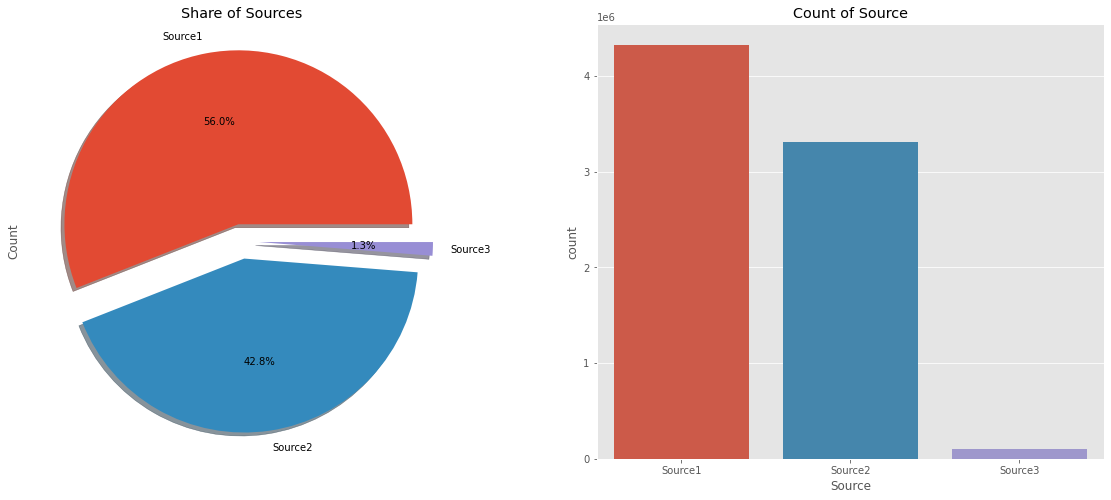

In [23]:
#Pie chart & bar chart of each individual chart
f,ax=plt.subplots(1,2,figsize=(20,8))

df['Source'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Share of Sources') 
ax[0].set_ylabel('Count') 

sns.countplot('Source',data=df,ax=ax[1],order=df['Source'].value_counts().index)

ax[1].set_title('Count of Source')
plt.show()

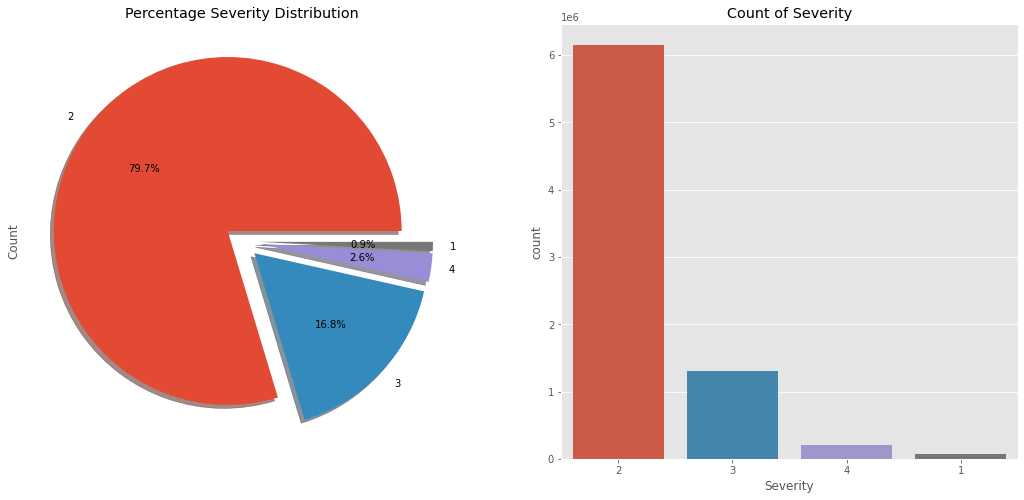

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))

df['Severity'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')

sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')

plt.show()

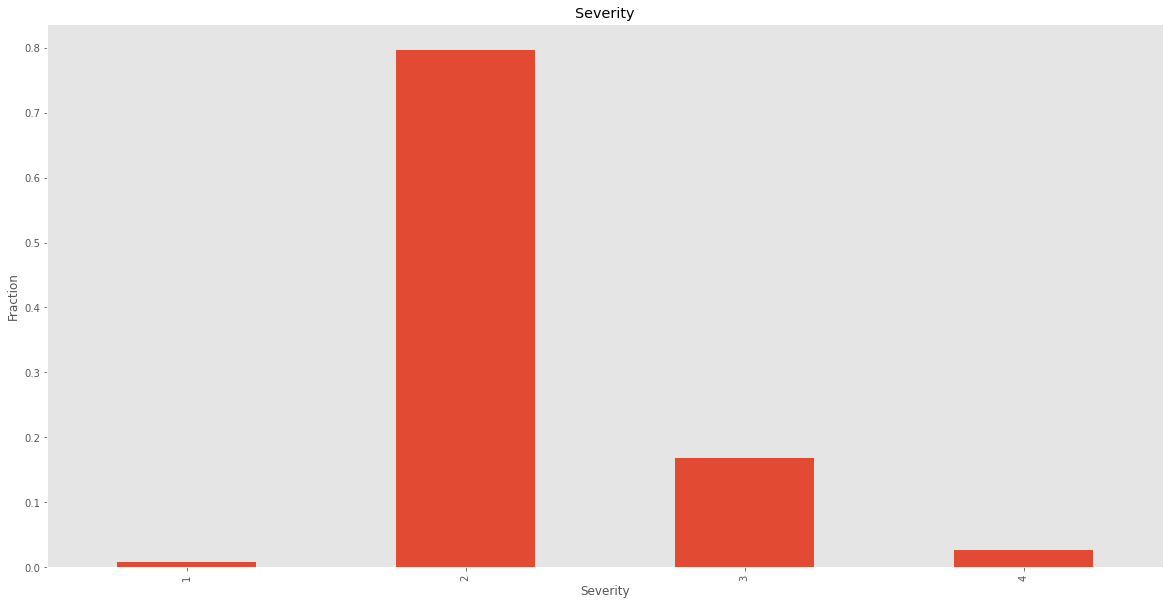

In [25]:
plt.figure(figsize = (20,10))

df.Severity.value_counts(normalize=True).sort_index().plot.bar()

plt.grid(False)

plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

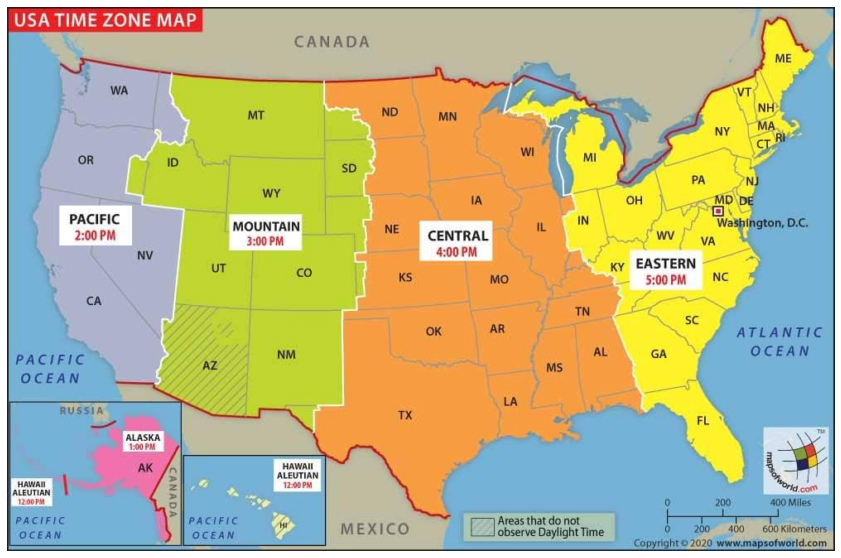

In [31]:
import matplotlib.pyplot as plt

from PIL import Image 

%matplotlib inline

import numpy as np

img=np.array(Image.open('/kaggle/input/ustimezone/ustimezone.jpg'))

fig=plt.figure(figsize=(30,10))

plt.imshow(img,interpolation='bilinear')

plt.axis('off')

plt.show()

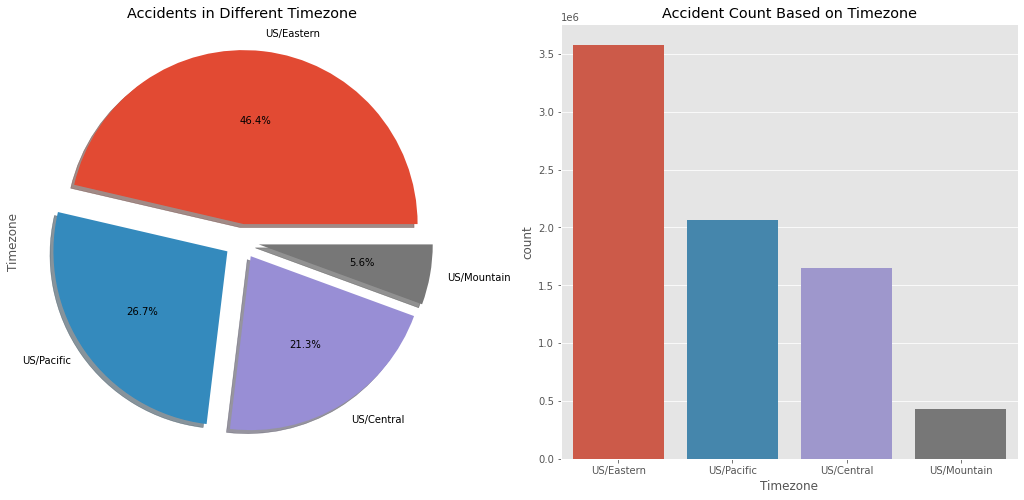

In [32]:
f,ax=plt.subplots(1,2,figsize=(18,8))

df['Timezone'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Accidents in Different Timezone')
ax[0].set_ylabel('Timezone')

sns.countplot('Timezone',data=df,ax=ax[1],order=df['Timezone'].value_counts().index)
ax[1].set_title('Accident Count Based on Timezone')

plt.show()

In [33]:
start = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S') 

end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

Duration = (end-start)

T_D = 'Time_Duration(min)'
df[T_D] = Duration.astype('timedelta64[m]') 

df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min)
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,314.0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Day,30.0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Day,Day,30.0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,Night,Day,Day,Day,30.0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,True,False,Day,Day,Day,Day,30.0


top 20 accident durations correspond to 54.8% of the data


Text(0, 0.5, 'Fraction')

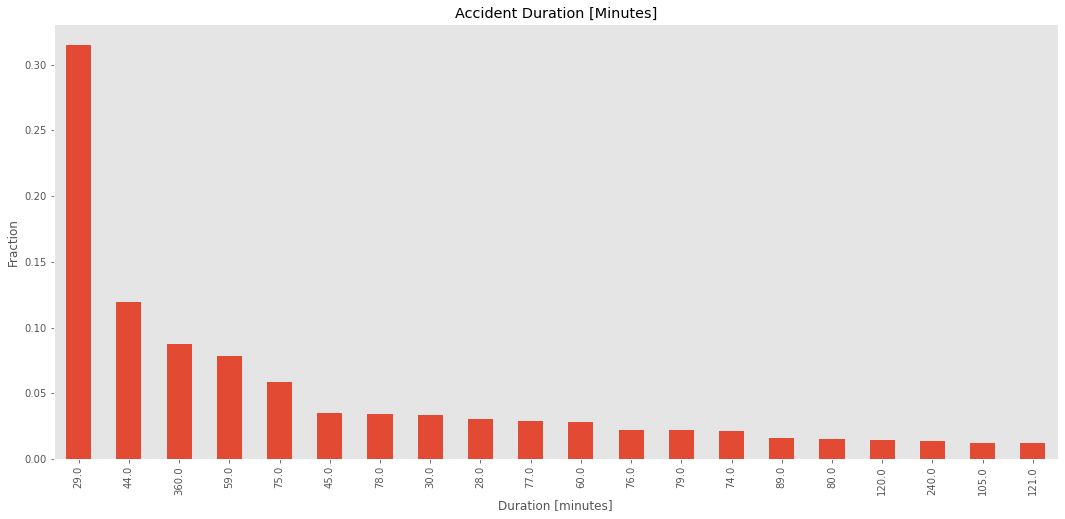

In [34]:
#Bar chart according to the duration
top20 = Duration.astype('timedelta64[m]').value_counts().nlargest(20)

print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(Duration)))

(top20/top20.sum()).plot.bar(figsize=(18,8))

plt.grid(False)
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction')

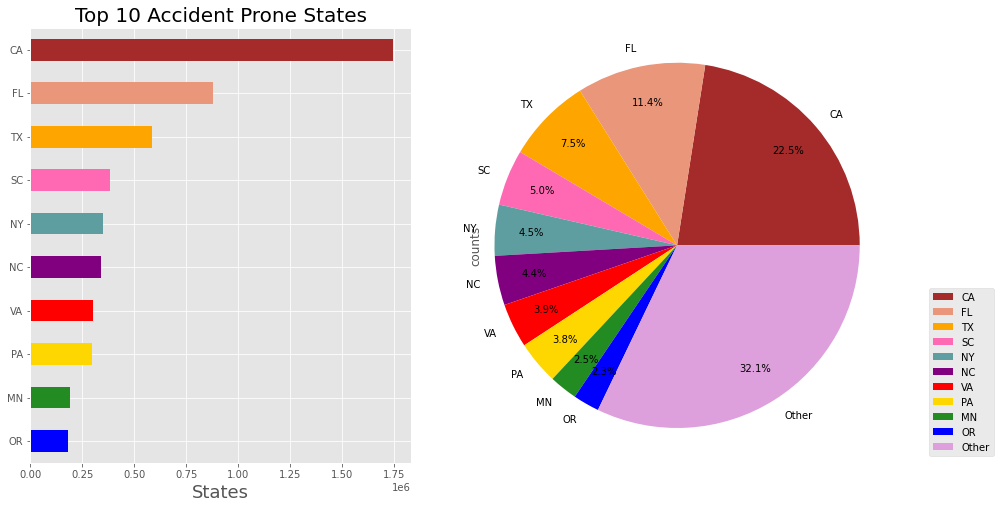

In [35]:
#Pie chart according to the states
fig,ax=plt.subplots(1,2,figsize=(15,8))

clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])

ax[0].set_title("Top 10 Accident Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=df['State'].value_counts()
groups=list(count.index)[:10]
groups.append('Other')

counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg(sum))

type_dict=pd.DataFrame({"group":groups,"counts":counts})

clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.8, radius=1.2,ax=ax[1])

plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 

plt.subplots_adjust(wspace =0.2, hspace =1)

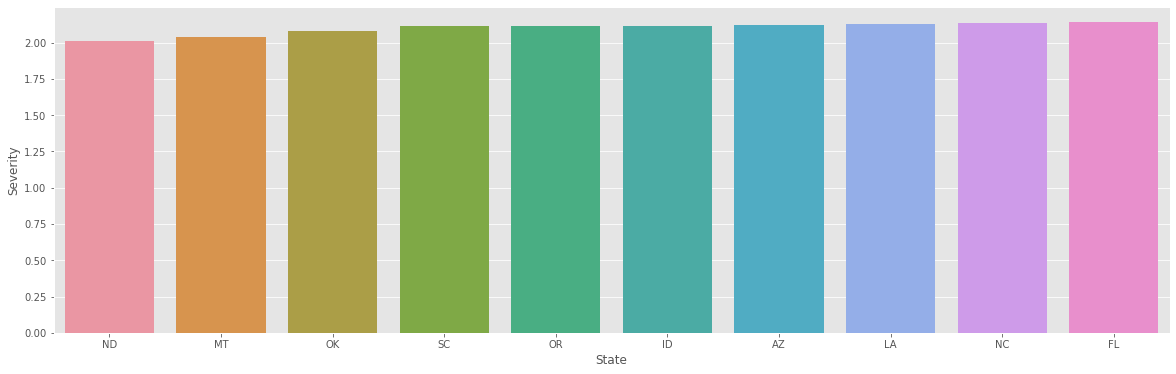

In [36]:
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()

plt.figure(figsize=(20,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State.head(10))

plt.ioff()

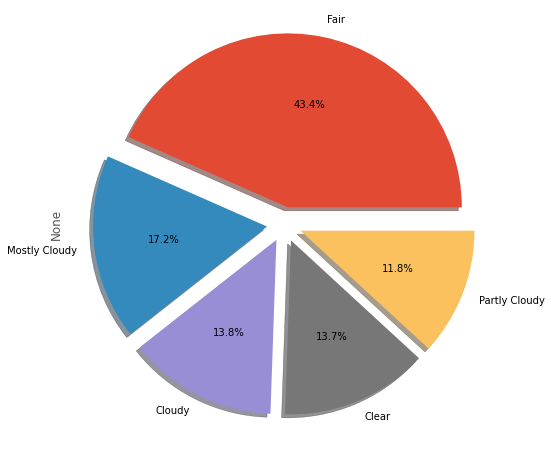

In [37]:
plt.figure(figsize=(20,8))
df.groupby('Weather_Condition') \
        .size() \
        .sort_values(ascending = False) \
        .iloc[:5] \
        .plot.pie(explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)

plt.ioff()

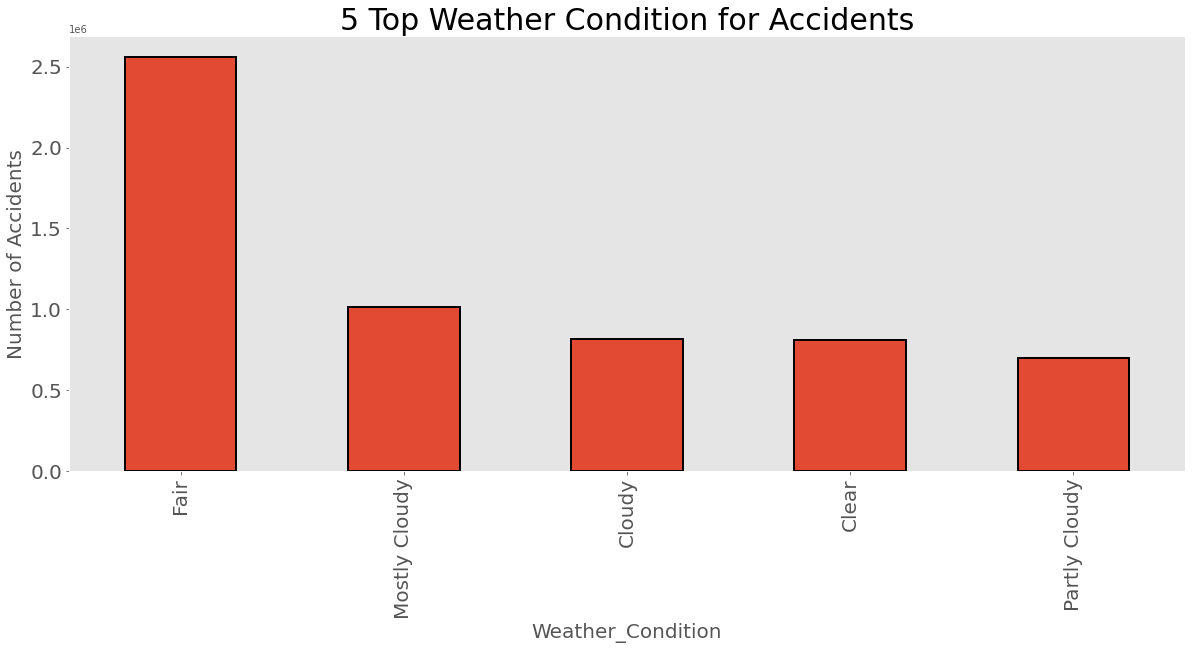

In [38]:
fig, ax=plt.subplots(figsize=(20,8))

df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)

plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)

plt.title('5 Top Weather Condition for Accidents',fontsize=30)
plt.grid(False)
plt.ioff()

In [39]:
bool_cols = [col for col in df.columns if df[col].dtype == np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis = 1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 758168 non one hot metadata rows, which are 9.8% of the data


In [40]:
bools = booldf.sum(axis=0)

bools

Amenity              96334
Bump                  3514
Crossing            873763
Give_Way             36582
Junction            571342
No_Exit              19545
Railway              66979
Roundabout             249
Station             201901
Stop                214371
Traffic_Calming       7598
Traffic_Signal     1143772
Turning_Loop             0
dtype: int64

Text(0.5, 1.0, 'Proximity to Traffic Object')

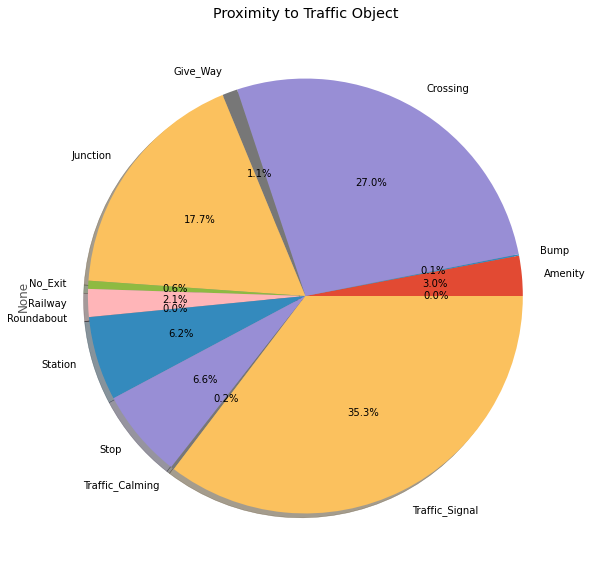

In [41]:
bools.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.title('Proximity to Traffic Object')

In [43]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')

df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min)
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,314.0
2016-02-08 06:07:59,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Day,30.0
2016-02-08 06:49:27,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Day,Day,30.0
2016-02-08 07:23:34,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,Night,Day,Day,Day,30.0
2016-02-08 07:39:07,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,True,False,Day,Day,Day,Day,30.0


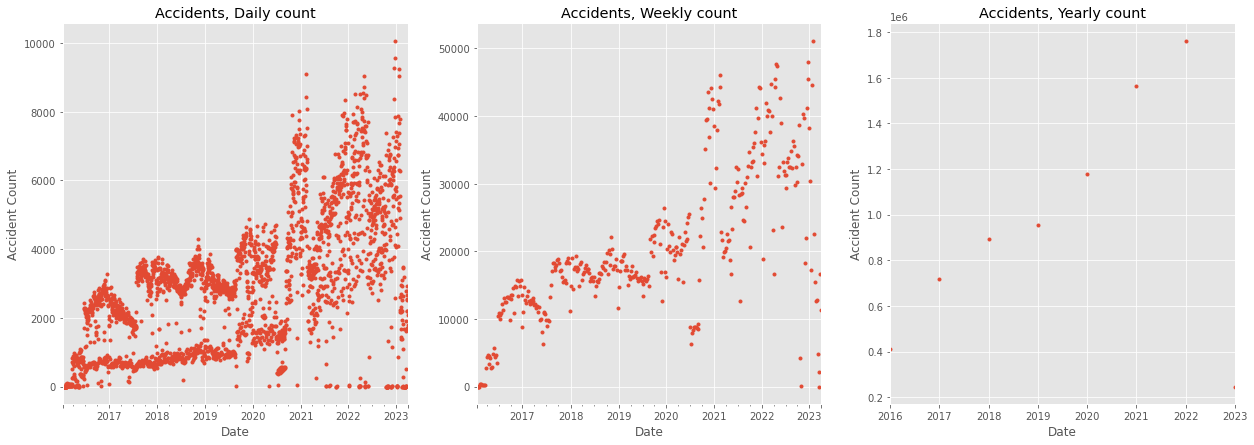

In [44]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}

plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');


In [45]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y/%m/%d %H:%M:%S")


df['Year'] = df['Start_Time'].dt.year 
df['Month'] = df['Start_Time'].dt.strftime('%b') 
df['DayOfWeekNum'] = df['Start_Time'].dt.dayofweek 
df['DayOfWeek'] = df['Start_Time'].dt.day_name() 
#df['Weekday']=df['Start_Time'].dt.strftime('%a')
df['MonthDayNum'] = df['Start_Time'].dt.day 
df['HourOfDay'] = df['Start_Time'].dt.hour

df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min),Year,Month,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,Night,Night,Night,314.0,2016,Feb,0,Monday,8,5
2016-02-08 06:07:59,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,Night,Night,Day,30.0,2016,Feb,0,Monday,8,6
2016-02-08 06:49:27,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,Night,Day,Day,30.0,2016,Feb,0,Monday,8,6
2016-02-08 07:23:34,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,Day,Day,Day,30.0,2016,Feb,0,Monday,8,7
2016-02-08 07:39:07,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,Day,Day,Day,30.0,2016,Feb,0,Monday,8,7


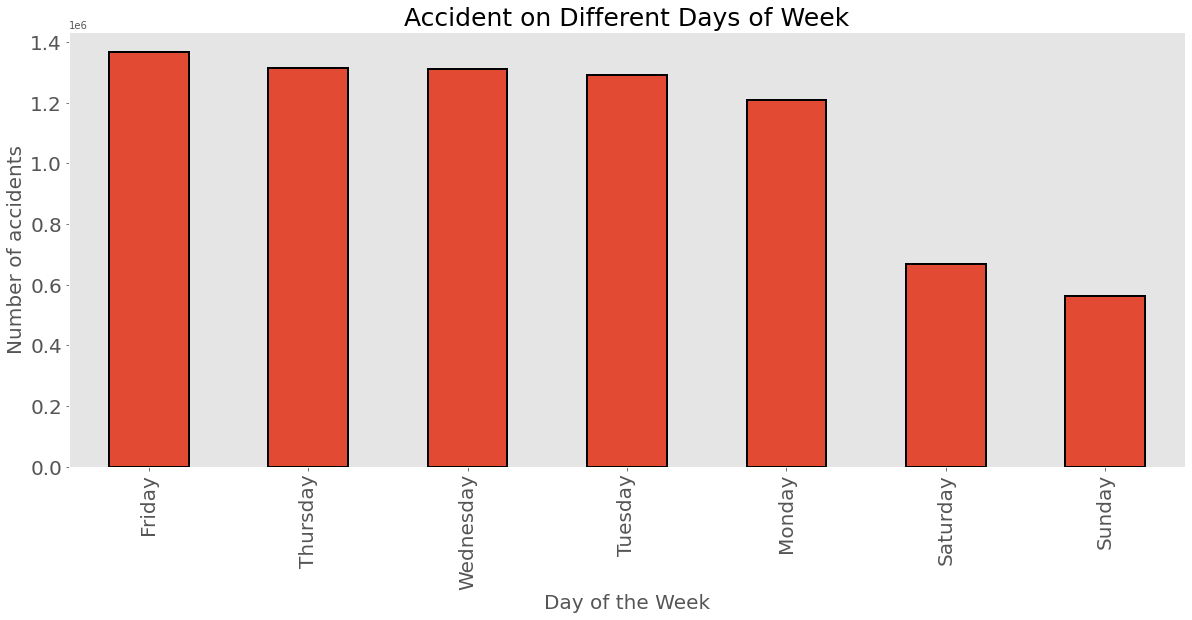

In [46]:
fig, ax=plt.subplots(figsize=(20,8))
df['DayOfWeek'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day of the Week',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Days of Week',fontsize=25)
plt.grid(False)
plt.ioff()

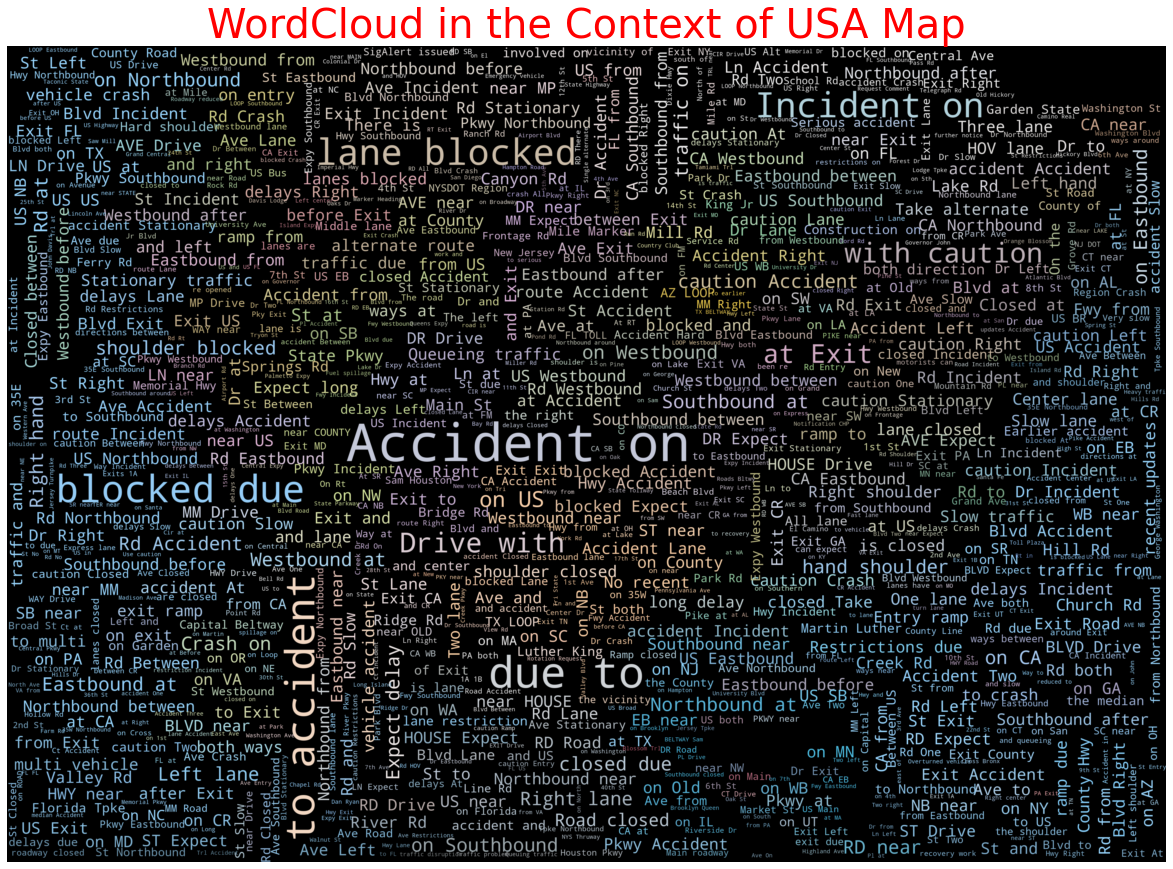

In [54]:
from wordcloud import WordCloud

plt.style.use('ggplot')


Words = df["Description"].str.split("(").str[0].value_counts().keys()

background_image = np.array(Image.open('/kaggle/input/us3map/us3.jpg')) 

img_colors = ImageColorGenerator(background_image) 

Stopwords = set(STOPWORDS) 

WC = WordCloud(scale=5,max_words=1000,mask = background_image,max_font_size = 36,stopwords = Stopwords,background_color="black").generate(" ".join(Words))


WC.recolor(color_func=img_colors) 

plt.figure(figsize=(30,15))
plt.imshow(WC,interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud in the Context of USA Map",color='R',Fontsize = 40)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


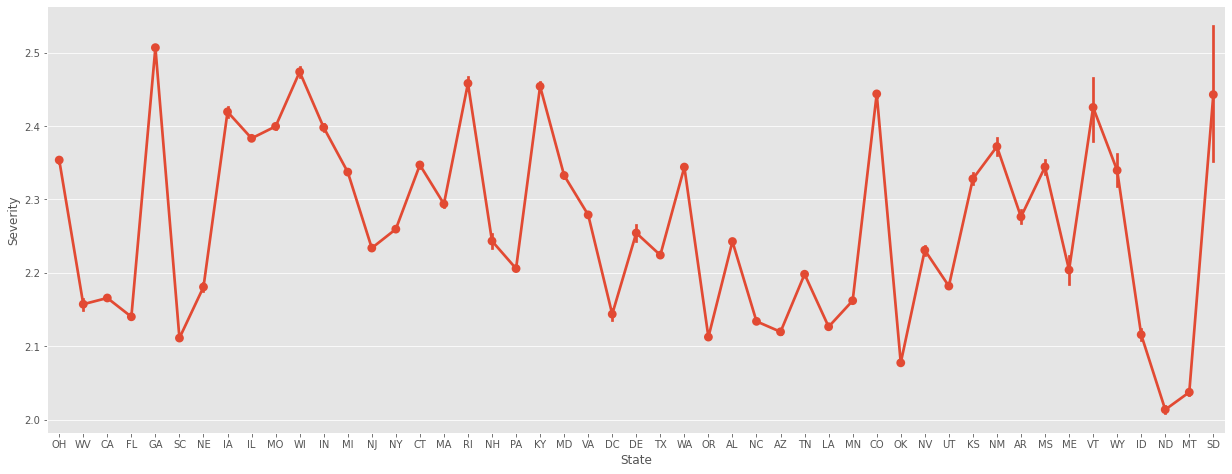

In [49]:
sns.factorplot('State','Severity',data=df)

fig=plt.gcf()

fig.set_size_inches(20,7)

plt.show()

<Figure size 1440x576 with 0 Axes>

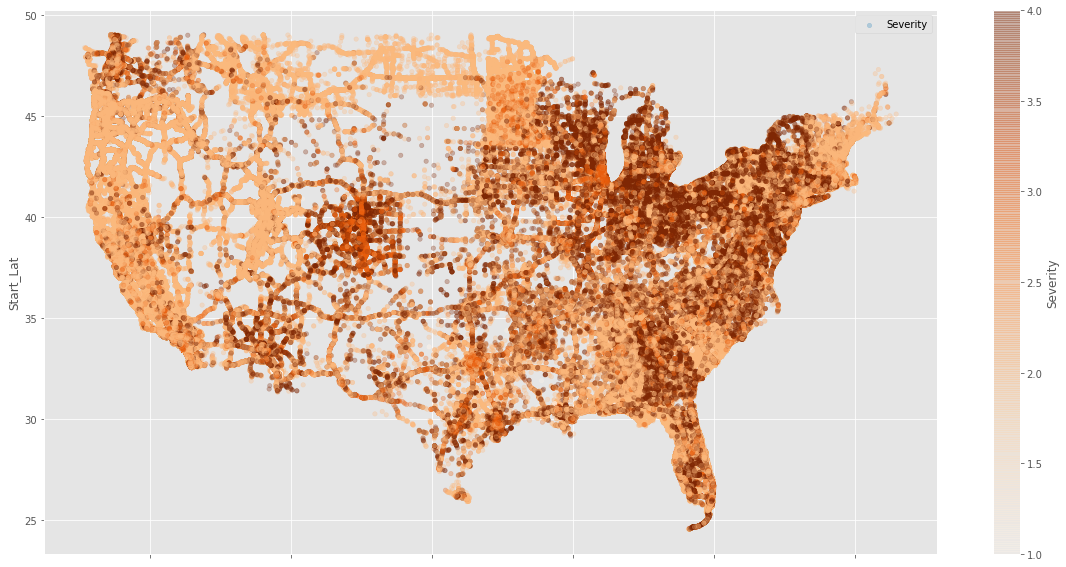

In [50]:
#Scatterplot of accidents
plt.figure(figsize=(20,8))
Point = df[df.Severity<5]
Sca = Point.plot(kind='scatter', x='Start_Lng',y='Start_Lat',label='Severity',c='Severity',
                 cmap=plt.get_cmap('Oranges'),colorbar=True,alpha=0.3,figsize=(20,10))

Sca.legend()
plt.ioff()

In [5]:
feature_list=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State',
             'Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition',
             'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming',
             'Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']